##Using beauty to plot trigger rates

This is an ipython notebook. CERN provides servers for jupyter, at swan.cern.ch.

This shows how to use the PBeast python interface and Wainer's [beauty](https://gitlab.cern.ch/vandelli/beauty) wrapper on top of it to access TRP rates.

First, check out the package and copy it to an eos area, e.g. on lxplus:
```
git clone https://:@gitlab.cern.ch:8443/vandelli/beauty.git
cp -r beauty /eos/user/a/auser/
```

Then, clone the beauty_tools package:
```
https://:@gitlab.cern.ch:8443/hrussell/beauty_tools.git
cp -r beauty_tools /eos/user/a/auser/
```

You'll need to add the following line to the file `setup.sh` inside `beauty/`:

```
export PYTHONPATH=$PYTHONPATH:/eos/user/a/auser/beauty_tools/python/
export TNS_ADMIN=/eos/project/o/oracle/public/admin
export CORAL_DBLOOKUP_PATH=/cvmfs/atlas.cern.ch/repo/sw/software/21.1/AthenaP1/21.1.12/InstallArea/x86_64-slc6-gcc62-opt/XML/AtlasAuthentication
export CORAL_AUTH_PATH=/cvmfs/atlas.cern.ch/repo/sw/software/21.1/AthenaP1/21.1.12/InstallArea/x86_64-slc6-gcc62-opt/XML/AtlasAuthentication
```

Otherwise, python won't be able to find PlotTools.py when you try to import it, and you won't be able to access runs via COOL.

Then go to https://swan.cern.ch and when creating your session, choose software stack = 91 and
specify `$CERNBOX_HOME/beauty/setup.sh` as your setup script. Note that `$CERNBOX_HOME` points to `/eos/user/a/auser/`, not `/eos/atlas/user/a/auser/`. 

To run the commands in this notebook, you have some options:
 (1) download this and copy to your eos home, and open it from the list of files in swan that you'll see once the session has started
 (2) upload it on the swan main page once you've stared the session (top right corner), or
 (3) create a new notebook (`New` in the top right corner, Python 2) and copy and paste each command into a new notebook cell

You will also need a kerberos ticket in your session. You can execute this in the notebook (as in the first cell here), or alternatively open a new terminal from the `Control Panel` and type `kinit -f` there. Make sure it outputs `0` - if it says `256`, you've typed your password wrong.

Instructions to plot using ROOT and retrieve the rates directly with the run number, using COOL, are provided here (as are instructions for most of what is done in this notebook): https://cernbox.cern.ch/index.php/s/glrfhROjyJme3Sc

If you find yourself locally adding functionality to CoolTools.py, PlotTools.py, or creating a new tools file, please feel free to make a merge request into the beauty_tools package. A note of warning - if you do make changes, you'll have to restart the kernel to properly re-import your changes. Thus, when designing a new function, you're better off doing it within the notebook and only moving it into the imported file once the development is complete.

In [4]:
import getpass
import os
os.system("echo '%s' | kinit" % getpass.getpass())

········


0

The "%matplotlib notebook" line is needed so plots are displayed inline

In [5]:
%matplotlib notebook
import sys
sys.path.append(os.environ['CERNBOX_HOME'] + '/beauty/python')

from beauty import Beauty
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

#these make the plots look more ATLAS-like
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

In [6]:
beauty = Beauty()

## PlotTools and the TRPTimepoints class

`PlotTools.py` contains the main helper class for interpreting `TimePoint_IS` information from PBeast.

The data is retrieved for the given time interval, in addition the row and column labels are retrieved *for the beginning of the interval only*. This assumes that you retrieve a time period with stable conditions. In practice this should work as long as the super master key does not change during the interval.

If trigger rates are retrieved in full resolution, you should expect around 30s for every hour of run time.
Specify a downsample interval instead to speed things up. Usually a downsample interval of 200 is still sufficient granularity for a long run.

Some example runs/time intervals are provided.

Examples are provided for both interfacing via COOL to access with run number and to access directly with a datetime range. The latter can be useful if you want to span a time with multiple runs (though all examples here show datetime within a single run. For past runs, these times are most easily accessed in the data summary pages - https://atlas.web.cern.ch/Atlas/GROUPS/DATAPREPARATION/DataSummary/2017/.)

In [7]:
import PlotTools as tools
import COOLTools as cool

Welcome to JupyROOT 6.08/02


In [6]:
coolReader = cool.RunInfoReader()

Data source lookup using /cvmfs/atlas.cern.ch/repo/sw/software/21.1/AthenaP1/21.1.12/InstallArea/x86_64-slc6-gcc62-opt/XML/AtlasAuthentication/dblookup.xml file


In [7]:
ratesFromCool = cool.retrieve_rates_for_run(coolReader,339070)

retrieved run 339070  between times  2017-10-25 14:32:54 2017-10-26 07:05:21


In [ ]:
#A nice 13 TeV run
runNumber = '339070'
since = dt.datetime(2017, 10, 25, 14, 30, 0)
till  = dt.datetime(2017, 10, 26, 5, 0, 0)
ds_int = 200
# Retrieve the data for a given interval
rates = tools.TRPTimepoints(since, till, 
                      'L1_Rate|HLT_Rate', 
                      default_columns={ 'HLT_Rate': 'output', 'L1_Rate': 'TAP'},
                      downsample_interval=ds_int
                     )

print 'retrieved data'
#7/10/11 09:03  17/10/12 04:02

In [8]:
#Unlevelled run with peak <mu> ~ 75
runNumber_mu75 = '339849'
since = dt.datetime(2017, 11, 2, 17, 15, 0)
till  = dt.datetime(2017, 11, 3, 7, 25, 0)
ds_int = 200
# Retrieve the data for a given interval
rates_mu75 = tools.TRPTimepoints(since, till, 
                      'L1_Rate|HLT_Rate', 
                      default_columns={ 'HLT_Rate': 'output', 'L1_Rate': 'TAP'},
                      downsample_interval=ds_int
                     )

print 'retrieved data'
#7/10/11 09:03  17/10/12 04:02

retrieved data


In [9]:
#Low <mu> 13 TeV run
runNumber_lowMu = '341615'
since = dt.datetime(2017, 11, 25, 4, 15, 0)
till  = dt.datetime(2017, 11, 25, 22, 55, 0)
ds_int = 200
# Retrieve the data for a given interval
rates_lowMu = tools.TRPTimepoints(since, till, 
                      'L1_Rate|HLT_Rate', 
                      default_columns={ 'HLT_Rate': 'output', 'L1_Rate': 'TAP'},
                      downsample_interval=ds_int
                     )

print 'retrieved data'
#7/10/11 09:03  17/10/12 04:02

retrieved data


The function `print_available_items` prints the available HLT chains, groups/stream rates, or L1 items that are available for the time interval specified. WARNING: This does print a long list. 

You can remove the output afterwards by going to Cell -> Current Outputs -> Clear.

In [ ]:
rates.print_available_items(PrintHLTChains = True, PrintGroupsAndStreams = False, PrintL1Items = False)

To access the rate of a trigger, you just need to get the timestamps and rate (data) for a given type (HLT_Rate or L1_Rate), a given 'row' (the trigger name), and 'column' (think the columns in TRP: for L1 these are TBP, TAP, and TAV, and for HLT they are input, prescaled, and output.

Also contained within the 'rates' object are the pileup, lumi, livefraction, hltoutput (rate), mainRate (rate of physics_Main), mainDataRate (data rate of physics_Main), and hltDataRate (output data rate of the HLT). 

Other information can be retrieved using beauty:

e.g. pileup is retireved like this:
`pileup = beauty.timeseries(since, till, 'OLC', 'OCLumi', 'Mu', 'OLC.OLCApp/ATLAS_PREFERRED_LBAv_PHYS', downsample_interval=ds_int)[0].y`
(.x would retrieve the timestamps, .y outputs the pileup)

The timestamps don't necessarily agree with those from the trigger rates, unfortunately (e.g. offset by ms). 

Quick plots can be made like this, for e.g. rate vs. time or rate vs. lumi:

<IPython.core.display.Javascript object>


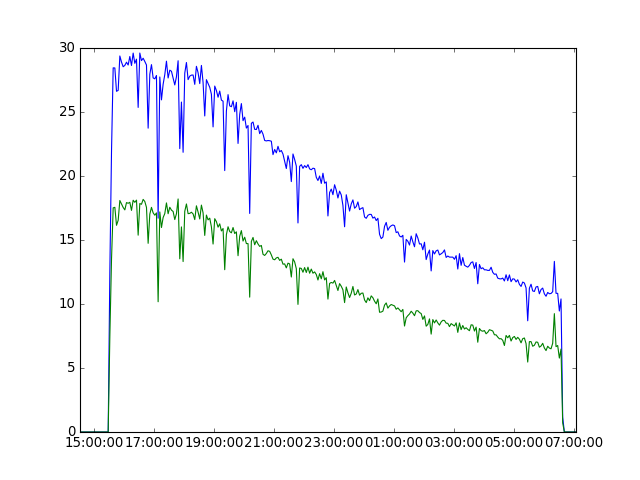

In [8]:
plt.close('all')
timestamps, data = ratesFromCool.get_data('HLT_Rate','HLT_j420','output')
plt.plot(timestamps,data)
timestamps, data = ratesFromCool.get_data('HLT_Rate','HLT_j460','output')
plt.plot(timestamps,data)

<IPython.core.display.Javascript object>


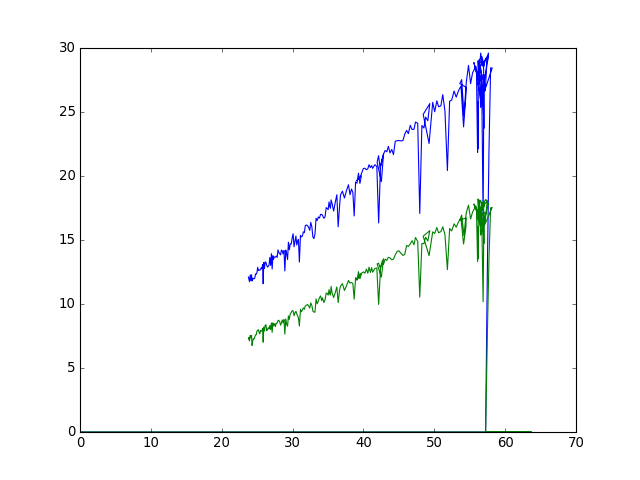

In [11]:
plt.close('all')
timestamps, data = rates.get_data('HLT_Rate','HLT_j420','output')
plt.plot(rates.pileup,data)
timestamps, data = rates.get_data('HLT_Rate','HLT_j460','output')
plt.plot(rates.pileup,data)

More complicated plots can be made with the helper functions in `PlotTools.py`. This example plots the rate vs. luminosity for chains in the `trigger_names` list. Here, having a tuple with ['HLT','L1'] is unnecessary, because only the HLT item is used. In other functions, the L1 item can be provided to unprescale the trigger. 
```
def plotRatevsLumi(trp, trig_level, row_name, column_name, label = None, colour = 'blue', marker = 'o',
                   useLivefraction = True, doLinearFit = True, minimumRateForFit = 5, sig_remove = 4):
```

If `doLinearFit` is enabled, the function returns the slope and intercept of a best-fit line. The fit will exclude any points below `minmumRateForFit` or with `|rate - mean| > sig_remove*stdev`.

If `useLiveFraction` is enabled, the rate will be divided by the livefraction: `rate_new = rate*100/livefraction`. This is necessary if you want to compare rates betwen runs, since otherwise different deadtime would mean the rates artificially disagree.

In this example, two triggers are plotted with and without livefraction normalization. The estimated rates for each are calculated for L = 2e34, using the linear fit.

<IPython.core.display.Javascript object>


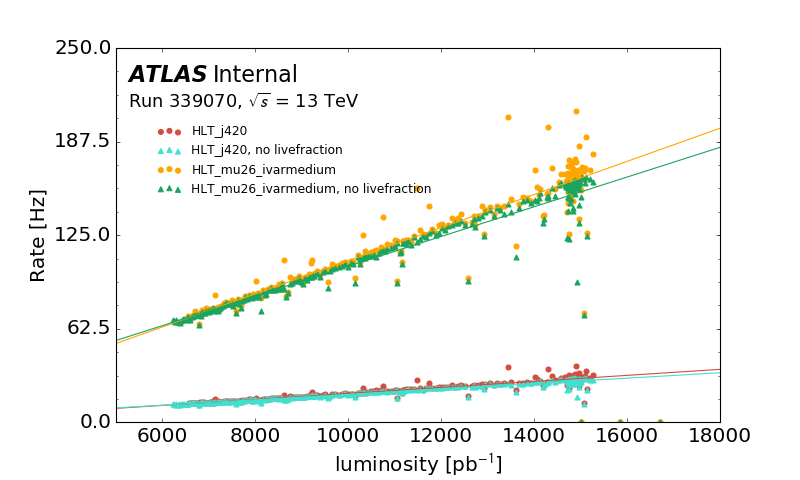

HLT_j420 rate estimate at L = 2e34:  39.4199566955
Now without taking into account deadtime:
HLT_j420 rate estimate at L = 2e34:  36.7476973293
HLT_mu26_ivarmedium rate estimate at L = 2e34:  218.507277706
Now without taking into account deadtime:
HLT_mu26_ivarmedium rate estimate at L = 2e34:  203.505916978


In [10]:
plt.close('all')
plt.figure(figsize=(10,6))

trigger_names = [
    ['HLT_j420','L1_J100'],
    ['HLT_mu26_ivarmedium','L1_MU20']
]

colours = ['#d44c3d','orange','#206da1','red']
colours2 = ['turquoise','#1aa55e','gray','black']
for c,c2,trigger in zip(colours,colours2,trigger_names):

    m,b = tools.plotRatevsLumi(rates, 'HLT_Rate', trigger[0], 'output', colour=c, useLivefraction=True,doLinearFit=True)
    print trigger[0] +' rate estimate at L = 2e34: ', m*20000. + b
    m,b = tools.plotRatevsLumi(rates, 'HLT_Rate', trigger[0], 'output', label = trigger[0]+', no livefraction',colour=c2, marker = '^', useLivefraction=False,doLinearFit=True)
    print 'Now without taking into account deadtime:'
    print trigger[0] +' rate estimate at L = 2e34: ', m*20000. + b

ax = plt.gca()

#Define top/right/left parameters here so we can access them for label placement
top = 250; bottom = 0; right = 18000; left = 5000

ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)

ax.yaxis.set_major_locator(ticker.MultipleLocator(top/4.))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(top/16.))

ax.set_ylabel('Rate [Hz]',fontsize=18)
ax.set_xlabel('luminosity [pb'+r'$^{-1}$'+']', fontsize=18)
ax.text((right-left)*0.02 + left, top*0.91, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
ax.text((right-left)*0.16+left, top*0.91, 'Internal',fontsize=20,horizontalalignment='left')
ax.text((right-left)*0.02+left, top*0.84, 'Run '+runNumber+', '+r'$\sqrt{s}$ = 13 TeV',fontsize=16,horizontalalignment='left')

padding = 0.02
box = ax.get_position()
ax.set_position([box.x0+padding, box.y0+padding, box.width-padding, box.height-padding])
ax.legend(loc='center left', bbox_to_anchor=(0.05,0.7),prop={'size':11},frameon=False)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
#plt.savefig('myPlot.pdf', format='pdf')

This next cell plots the trigger's cross-section vs. pileup:

```
def plotXSvsPileup(trp, trig_level, row_name, column_name, label = None, colour = None, marker = 'o',
                   unprescale = True, l1seed = '', doLinearFit = False, sig_remove = 0, doOnlyL1 = False):
```

If `doLinearFit` is enabled, the function returns the slope and intercept of a best-fit line. The fit will exclude any points with `|xs - mean| > sig_remove*stdev`.

Here, the rates are automatically rescaled by the livefraction, because a cross-section doesn't make sense otherwise. 

If `unprescale` is enabled, the trigger cross-section provided will be using rate * l1prescale * hltprescale. The L1 seed needs to be provided in order to calculate the L1 prescale.

If you just want to plot the L1 cross-section, this can be done with the flag `doOnlyL1`.

<IPython.core.display.Javascript object>


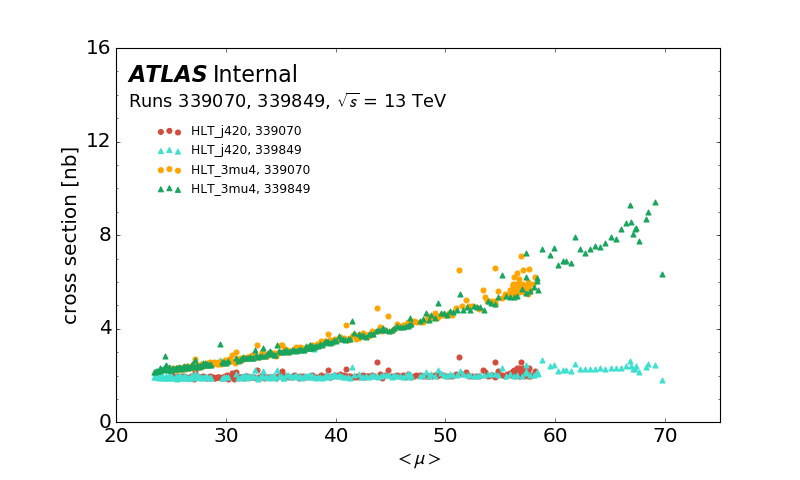

In [11]:
plt.close('all')
plt.figure(figsize=(10,6))

trigger_names = [
    ['HLT_j420','L1_J100'],
    ['HLT_3mu4','L1_3MU4']
]

colours = ['#d44c3d','orange','#206da1','red']
colours2 = ['turquoise','#1aa55e','gray','black']
for c,c2,trigger in zip(colours,colours2,trigger_names):
    tools.plotXSvsPileup(rates,'HLT_Rate',trigger[0],'output', label = trigger[0]+', ' + runNumber, colour = c, l1seed = trigger[1], unprescale=True)
    tools.plotXSvsPileup(rates_mu75,'HLT_Rate',trigger[0],'output', label = trigger[0]+', ' + runNumber_mu75, colour = c2, marker = '^', l1seed = trigger[1],unprescale=True)    

ax = plt.gca()

#Define top/right/left parameters here so we can access them for label placement
top = 16; bottom = 0; left = 20;right = 75

ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)

ax.yaxis.set_major_locator(ticker.MultipleLocator(top/4.))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(top/16.))

ax.set_ylabel('cross section [nb]',fontsize=18)
ax.set_xlabel(r'$<\mu>$',fontsize=18)
ax.text((right-left)*0.02 + left, top*0.91, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
ax.text((right-left)*0.16+left, top*0.91, 'Internal',fontsize=20,horizontalalignment='left')
ax.text((right-left)*0.02+left, top*0.84, 'Runs '+runNumber+', '+runNumber_mu75+', '+r'$\sqrt{s}$ = 13 TeV',fontsize=16,horizontalalignment='left')

padding = 0.02
box = ax.get_position()
ax.set_position([box.x0+padding, box.y0+padding, box.width-padding, box.height-padding])
ax.legend(loc='center left', bbox_to_anchor=(0.05,0.7),prop={'size':11},frameon=False)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
#plt.savefig('myPlot.pdf', format='pdf')

Helper functions also exist to plot the ratio of HLT rate / L1 rate, or the ratio between two HLT or L1 items.

```
def plotL1HLTRatio(trp, row_name1, row_name2, column_name = None, label = None, colour = 'blue', marker = 'o'):
def plotRatio(trp, name, row_name1, row_name2, column_name = None, label = None, colour = 'blue', marker = 'o'):
```

<IPython.core.display.Javascript object>


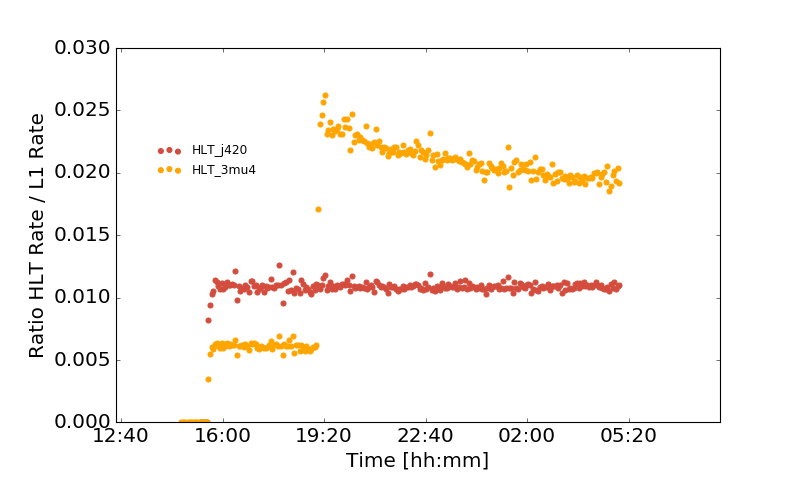

PlotTools.py:309: RuntimeWarning: invalid value encountered in divide
  plt.scatter(timestamps, data/data2, label=label, color = colour, marker=marker)


In [12]:
plt.close('all')
plt.figure(figsize=(10,6))

trigger_names = [
    ['HLT_j420','L1_J100'],
    ['HLT_3mu4','L1_3MU4']
]

colours = ['#d44c3d','orange','#206da1','red']
colours2 = ['turquoise','#1aa55e','gray','black']
for c,c2,trigger in zip(colours,colours2,trigger_names):
    tools.plotL1HLTRatio(rates,trigger[0],trigger[1],'TAV', label = trigger[0], colour = c)
ax = plt.gca()
import pytz
import matplotlib.dates as mdates
#Define top/right/left parameters here so we can access them for label placement
top = 0.03; bottom = 0; left = dt.datetime(2017, 10, 25, 10, 30, 0); right = dt.datetime(2017, 10, 26, 6, 20, 0)

ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); 

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=200))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=pytz.timezone('Europe/Zurich')))

#These are unfortunately a few hours off because timepoints uses UTC or something like that.
#Despite my best efforts to change timezone above.
ax.set_xlim(left=left)
ax.set_xlim(right=right)


ax.set_ylabel('Ratio HLT Rate / L1 Rate',fontsize=18)
ax.set_xlabel('Time [hh:mm]',fontsize=18)

#These need to be custom formatted with the timestamp
#ax.text(left, top*0.91, 'ATLAS Internal',fontsize=20,horizontalalignment='left')
#ax.text(left, top*0.84, 'Runs '+runNumber+', '+r'$\sqrt{s}$ = 13 TeV',fontsize=16,horizontalalignment='left')

padding = 0.02
box = ax.get_position()
ax.set_position([box.x0+padding, box.y0+padding, box.width-padding, box.height-padding])
ax.legend(loc='center left', bbox_to_anchor=(0.05,0.7),prop={'size':11},frameon=False)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
#plt.savefig('myPlot.pdf', format='pdf')

Here is an example of accessing something new from IS, not contained within the TRPTimepoints class:

In [10]:
#timestamps correspond to run 339070
since = dt.datetime(2017, 10, 25, 14, 30, 0)
till  = dt.datetime(2017, 10, 26, 5, 0, 0)
freeCores = beauty.timeseries(since, till, 'ATLAS', 'HLTSV', 'AvailableCores', 'DF.HLTSV.Events',downsample_interval=200)[0]

In [ ]:
plt.close('all')
plt.scatter(rates.pileup,freeCores.y)

In [ ]:
#example to access the ROS request rates
#timestamps correspond to run 339070
#List of ROSes came from 2018 data, could be misleading
since = dt.datetime(2017, 10, 25, 14, 30, 0)
till  = dt.datetime(2017, 10, 26, 5, 0, 0)
roses =['ROS-TIL-LBC-00','ROS-TIL-LBA-00','ROS-TIL-LBA-01','ROS-TIL-EBC-00','ROS-TIL-EBA-00','ROS-TIL-EBA-01']
ROSRequestRates = [beauty.timeseries(since, till, 'ATLAS', 'NPTriggerInfo', 'requestRate',
                            'DF.ROS.'+ros+'.TriggerIn0', downsample_interval=ds_int)[0] for ros in roses]
roses_pix =['ROS-PIX-BL-00','ROS-PIX-BL-01','ROS-PIX-B-00','ROS-PIX-B-01','ROS-PIX-B-03','ROS-PIX-B-04']
ROSRequestRates_pix = [beauty.timeseries(since, till, 'ATLAS', 'NPTriggerInfo', 'requestRate',
                            'DF.ROS.'+ros+'.TriggerIn0', downsample_interval=ds_int)[0] for ros in roses_pix]

In [ ]:
plt.close('all')
plt.figure(figsize=(10,12))

ts,data = rates.get_data("L1_Rate",'L1A',"TAV")
colours=['#328484','turquoise','orange','#206da1','#d44c3d','#58fcc1','#a10f6f','#df541e','#80ba27',
           '#3e0e4c','#e81f3f', '#ff8b94']
markers=['o', 'v', '^', '<', '>','*', 'h', 'H', 'D', 'd', 'P', 'X']
runNumber='339070'
plt.subplot(211)

#ROSData.y to access the data, .x gives the timestamp.
for c,m,ros,ROSData in zip(colours,markers,roses_pix,ROSRequestRates_pix):
    plt.scatter(data*0.001,ROSData.y*0.001,color = c,marker=m,s=20,label=ros)

plt.plot([0,100],[0,100],color='gray',linestyle='--',linewidth=2)
ax = plt.gca()

#Define top/right/left parameters here so we can access them for label placement
top = 100; bottom = 0; right =100; left = 0
ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)

#ax.yaxis.set_major_locator(ticker.MultipleLocator(top/4.))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(top/16.))

ax.set_ylabel('Pixel ROS Request Rate [kHz]',fontsize=18)
ax.set_xlabel('L1Accept Rate [kHz]', fontsize=18)
ax.text((right-left)*0.02+left, bottom+(top-bottom)*0.91, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
ax.text((right-left)*0.16+left, bottom+(top-bottom)*0.91, 'Internal',fontsize=20,horizontalalignment='left')
ax.text((right-left)*0.02+left, bottom+(top-bottom)*0.84, 'Run '+runNumber+', '+r'$\sqrt{s}$ = 13 TeV',fontsize=16,horizontalalignment='left')

padding = 0.02
box = ax.get_position()
ax.set_position([box.x0+padding, box.y0+padding, box.width-padding, box.height-padding])
ax.legend(loc='center left', bbox_to_anchor=(0.01,0.58),prop={'size':14},frameon=False)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
        
plt.subplot(212)
for c,m,ros,ROSData in zip(colours,markers,roses,ROSRequestRates):
    plt.scatter(data*0.001,ROSData.y*0.001,color = c,marker=m,s=20,label=ros)

plt.plot([0,100],[0,100],color='gray',linestyle='--',linewidth=2)
ax = plt.gca()

#Define top/right/left parameters here so we can access them for label placement
top = 100; bottom = 0; right =100; left = 0
ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)

#ax.yaxis.set_major_locator(ticker.MultipleLocator(top/4.))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(top/16.))

ax.set_ylabel('Tile ROS Request Rate [kHz]',fontsize=18)
ax.set_xlabel('L1Accept Rate [kHz]', fontsize=18)
ax.text((right-left)*0.02+left, bottom+(top-bottom)*0.91, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
ax.text((right-left)*0.16+left, bottom+(top-bottom)*0.91, 'Internal',fontsize=20,horizontalalignment='left')
ax.text((right-left)*0.02+left, bottom+(top-bottom)*0.84, 'Run '+runNumber+', '+r'$\sqrt{s}$ = 13 TeV',fontsize=16,horizontalalignment='left')

padding = 0.02
box = ax.get_position()
ax.set_position([box.x0+padding, box.y0+padding, box.width-padding, box.height-padding])
ax.legend(loc='center left', bbox_to_anchor=(0.01,0.58),prop={'size':14},frameon=False)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
#plt.savefig('ROS-vs-L1Rate-PIX-run339070.pdf', format='pdf')

In [ ]:
plt.close('all')

timestamps, data = rates.get_data('L1_Rate','L1_J100','TBP')
fig, ax1 = plt.subplots()

ax1.plot(timestamps, data, color='blue')
ax2 = ax1.twinx()
ax2.plot(timestamps,rates.lumi,color='green')

import pytz
import matplotlib.dates as mdates

ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=200))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=pytz.timezone('Europe/Zurich')))

ax1.set_ylabel('L1_J100 Rate',fontsize=18)
ax1.set_xlabel('Time [hh:mm]',fontsize=18)

ax2.set_ylabel('Instantaneous luminsity [units]', color='green')       
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y', colors='green')
fig.tight_layout()
plt.show()
